# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [133]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [134]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [172]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [137]:
# Create lists to hold information
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []

In [138]:
# Create variables to track record and set number
set_num = 1
record = 0

print("Beginning Data Retrieval\n-----------------------------")

# Loop through the list of cities and try to perform a request for data on each
for place in cities:
    try:
        response = requests.get(query_url + place).json()
        city_name.append(response['name']) 
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        record = record + 1
        
        # Update record number and set number once count reaches 50
        if record == 50:
            set_num = set_num + 1
            record = 0
        print(f"Processing Record {record} of Set {set_num} | {place}")
        
    except:
        print(f"City not found. Skipping...")
        pass

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | pacasmayo
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | sitka
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | springdale
Processing Record 6 of Set 1 | te anau
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | ahipara
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | letlhakane
Processing Record 14 of Set 1 | romanovo
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | aksu
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | qingdao
Processing Record 21 of Set 1 | karpogory
Processing Record 22 of S

Processing Record 37 of Set 4 | georgetown
Processing Record 38 of Set 4 | kieta
Processing Record 39 of Set 4 | katobu
Processing Record 40 of Set 4 | henties bay
Processing Record 41 of Set 4 | undory
Processing Record 42 of Set 4 | severobaykalsk
Processing Record 43 of Set 4 | wageningen
Processing Record 44 of Set 4 | araceli
Processing Record 45 of Set 4 | makokou
Processing Record 46 of Set 4 | faanui
Processing Record 47 of Set 4 | bilibino
Processing Record 48 of Set 4 | dukat
Processing Record 49 of Set 4 | waldshut-tiengen
Processing Record 0 of Set 5 | zlobin
Processing Record 1 of Set 5 | port lincoln
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | chulym
Processing Record 4 of Set 5 | nadym
Processing Record 5 of Set 5 | rosetta
Processing Record 6 of Set 5 | chingirlau
Processing Record 7 of Set 5 | saint-georges
Processing Record 8 of Set 5 | ilulissat
Processing Record 9 of Set 5 | new norfolk
Processing Record 10 of Set 5 | tutoia
Processing

Processing Record 31 of Set 8 | leshukonskoye
Processing Record 32 of Set 8 | ostrovnoy
Processing Record 33 of Set 8 | guadalupe y calvo
City not found. Skipping...
Processing Record 34 of Set 8 | ruteng
Processing Record 35 of Set 8 | tilichiki
Processing Record 36 of Set 8 | puerto cabezas
Processing Record 37 of Set 8 | salinopolis
Processing Record 38 of Set 8 | charlestown
Processing Record 39 of Set 8 | northam
Processing Record 40 of Set 8 | hondo
Processing Record 41 of Set 8 | caravelas
Processing Record 42 of Set 8 | ugoofaaru
Processing Record 43 of Set 8 | safaga
Processing Record 44 of Set 8 | cayenne
Processing Record 45 of Set 8 | novallas
Processing Record 46 of Set 8 | dingalan
Processing Record 47 of Set 8 | general cepeda
Processing Record 48 of Set 8 | usinsk
Processing Record 49 of Set 8 | mezen
Processing Record 0 of Set 9 | vero beach
Processing Record 1 of Set 9 | clarence town
City not found. Skipping...
Processing Record 2 of Set 9 | makaryev
Processing Recor

Processing Record 19 of Set 12 | kuala lipis
Processing Record 20 of Set 12 | eyemouth
Processing Record 21 of Set 12 | natalio
Processing Record 22 of Set 12 | liwale
Processing Record 23 of Set 12 | vertientes
Processing Record 24 of Set 12 | ambon
Processing Record 25 of Set 12 | kangaatsiaq
Processing Record 26 of Set 12 | dromolaxia


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [140]:
# Create a DataFrame
orig_df = pd.DataFrame({"City" : city_name,
                         "Lat" : latitude,
                          "Lng" : longitude,
                          "Max Temp" : max_temp,
                          "Humidity" : humidity,
                          "Cloudiness" : clouds,
                          "Wind Speed" : wind_speed,
                          "Country" : country,
                          "Date" : date})

# Save DataFrame to CSV
orig_df.to_csv(output_data_file, index=False, header=True)

orig_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pacasmayo,-7.4006,-79.5714,23.64,65,54,5.74,PE,1612557018
1,East London,-33.0153,27.9116,22.86,89,100,4.92,ZA,1612556745
2,Sitka,57.0531,-135.3300,2.00,93,90,2.06,US,1612557018
3,Rikitea,-23.1203,-134.9692,26.08,68,0,4.81,PF,1612556753
4,Springdale,36.1867,-94.1288,10.56,34,40,5.66,US,1612556951


In [142]:
# Get descriptive statistics of the DataFrame
orig_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,22.469714,20.294434,9.702569,72.454861,54.161458,3.784740,1.612557e+09
std,32.711809,90.211197,17.952684,20.121579,40.265294,2.427726,1.021168e+02
min,-54.800000,-179.166700,-41.450000,10.000000,0.000000,0.240000,1.612556e+09
25%,-2.888575,-58.340475,-2.067500,63.750000,4.000000,2.025000,1.612557e+09
50%,27.255950,25.340650,15.550000,78.000000,75.000000,3.260000,1.612557e+09
75%,49.536575,99.434125,24.320000,87.000000,93.250000,5.140000,1.612557e+09
max,78.218600,179.316700,36.650000,100.000000,100.000000,14.310000,1.612557e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [165]:
# Create a new DataFrame for the cities with humidity > 100%
high_humidity_df = orig_df[orig_df['Humidity'] > 100]

In [166]:
#  Get the indices of cities that have humidity over 100%.
index = list(high_humidity_df.index.values)
index

[]

In [167]:
# Create a clean DataFrame by dropping cities with inaccurate humidity values
city_data_df = orig_df.drop(high_humidity_df.index, inplace = False)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pacasmayo,-7.4006,-79.5714,23.64,65,54,5.74,PE,1612557018
1,East London,-33.0153,27.9116,22.86,89,100,4.92,ZA,1612556745
2,Sitka,57.0531,-135.3300,2.00,93,90,2.06,US,1612557018
3,Rikitea,-23.1203,-134.9692,26.08,68,0,4.81,PF,1612556753
4,Springdale,36.1867,-94.1288,10.56,34,40,5.66,US,1612556951


In [164]:
# Get descriptive statistics of the DataFrame
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,22.469714,20.294434,9.702569,72.454861,54.161458,3.784740,1.612557e+09
std,32.711809,90.211197,17.952684,20.121579,40.265294,2.427726,1.021168e+02
min,-54.800000,-179.166700,-41.450000,10.000000,0.000000,0.240000,1.612556e+09
25%,-2.888575,-58.340475,-2.067500,63.750000,4.000000,2.025000,1.612557e+09
50%,27.255950,25.340650,15.550000,78.000000,75.000000,3.260000,1.612557e+09
75%,49.536575,99.434125,24.320000,87.000000,93.250000,5.140000,1.612557e+09
max,78.218600,179.316700,36.650000,100.000000,100.000000,14.310000,1.612557e+09


In [168]:
# Extract date value and assign to a variable
date_orig_df = city_data_df
date_orig_df['Date'] = pd.to_datetime(date_orig_df['Date'],unit='s')
date_values = date_time_values.dt.date
date = date_values[0]
date = date.strftime('%m/%d/%y')
date

'02/05/21'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

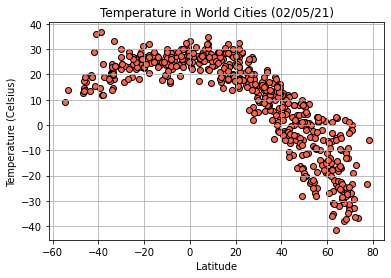

In [169]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color = 'tomato', edgecolors = 'black')

# Label plot
plt.title(f"Temperature in World Cities ({date})")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/TemperatureInWorldCities.png")

# Show plot
plt.show()

This graph plots the maximum temperature for each city in the dataset, against its latitude value. The equator is at 0 degrees latitude, while the South Pole is at -90 degrees and the North Pole is at +90 degrees. In essence this graph is showing the maximum temperature (F) in a city as compared to its position relative to the equator.

## Latitude vs. Humidity Plot

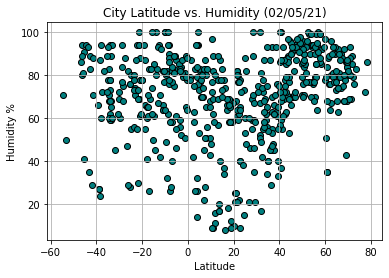

In [59]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color = 'teal', edgecolors = 'black')

# Label plot
plt.title(f"City Latitude vs. Humidity ({date})")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/CityLatitude_vs_Humidity.png")

# Show plot
plt.show()

This graph plots the humidity for each city in the dataset, against its latitude value. The equator is at 0 degrees latitude, while the South Pole is at -90 degrees and the North Pole is at +90 degrees. In essence this graph is showing the humidity (%) in a city as compared to its position relative to the equator.

## Latitude vs. Cloudiness Plot

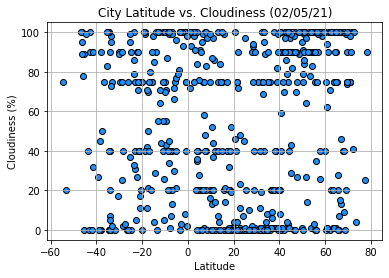

In [60]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color = 'dodgerblue', edgecolors = 'black')

# Label plot
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/CityLatitude_vs_Cloudiness.png")

# Show plot
plt.show()

This graph plots the cloudiness percentage for each city in the dataset, against its latitude value. The equator is at 0 degrees latitude, while the South Pole is at -90 degrees and the North Pole is at +90 degrees. In essence this graph is showing the cloudiness (%) in a city as compared to its position relative to the equator.

## Latitude vs. Wind Speed Plot

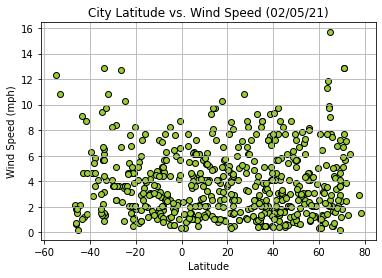

In [61]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color = 'yellowgreen', edgecolors = 'black')

# Label plot
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/CityLatitude_vs_WindSpeed.png")

# Show plot
plt.show()

This graph plots the wind speed for each city in the dataset, against its latitude value. The equator is at 0 degrees latitude, while the South Pole is at -90 degrees and the North Pole is at +90 degrees. In essence this graph is showing the wind speed (mph) in a city as compared to its position relative to the equator.

## Linear Regression

In [72]:
# Create df for Northern Hemisphere and Southern Hemisphere
northern_hem_df = city_data_df[city_data_df['Lat'] > 0]
southern_hem_df = city_data_df[city_data_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7771107287030333


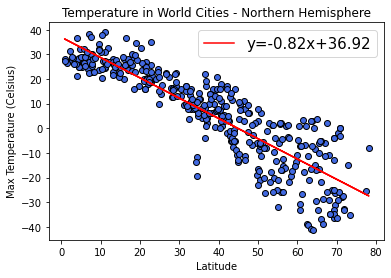

In [130]:
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, color = "royalblue", edgecolor = 'black')
plt.plot(x_values,regress_values, "red", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Label plot
plt.title("Temperature in World Cities - Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Fahrenheit)')
plt.legend(loc = "best", fontsize=15)

# Save the figure
plt.savefig("../output_data/TempvsLat_LinReg_NorthernHem.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3913170271818515


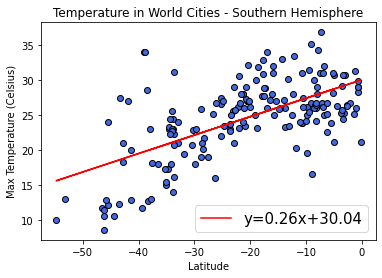

In [129]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, color = "royalblue", edgecolor = 'black')
plt.plot(x_values,regress_values, "red", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Label plot
plt.title("Temperature in World Cities - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Fahrenheit)')
plt.legend(loc = "best", fontsize=15)

# Save the figure
plt.savefig("../output_data/TempvsLat_LinReg_SouthernHem.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The graphs above study the relationship between a city's position relative to the equator and its maximum temperature. The data is divided into the northern and southern hemisphere to make it easier to identify trends. From this analysis, there appears to be a strong linear relationship between the observed and predicted values for cities in the northern hemisphere. This is evident in the r value of 0.78. The temperatures in the southern hemisphere, on the other hand, have an r value of 0.39. This indicates that there is a 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16450251826382506


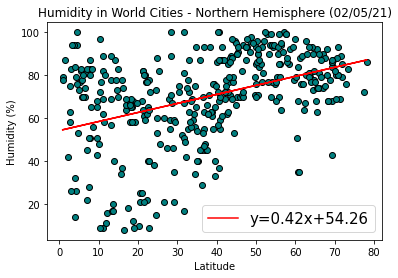

In [128]:
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, color = "teal", edgecolor = 'black')
plt.plot(x_values,regress_values, "red", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Label plot
plt.title(f"Humidity in World Cities - Northern Hemisphere ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend(loc = "best", fontsize=15)

# Save the figure
plt.savefig("../output_data/HumidityvsLat_LinReg_NorthernHem.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0023083806630110433


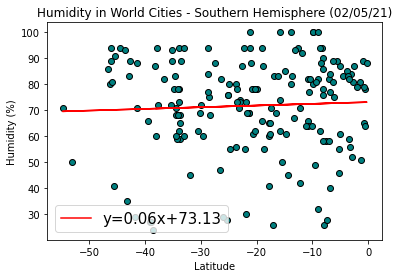

In [127]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, color = "teal", edgecolor = 'black')
plt.plot(x_values,regress_values, "red", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Label plot
plt.title(f"Humidity in World Cities - Southern Hemisphere ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend(loc = "best", fontsize=15)

# Save the figure
plt.savefig("../output_data/HumidityvsLat_LinReg_SouthernHem.png.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06327958696163682


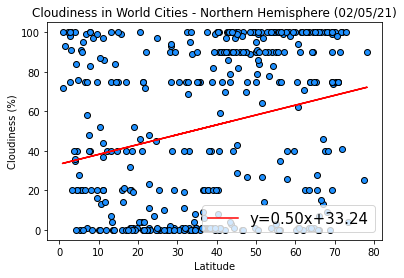

In [125]:
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, color = "dodgerblue", edgecolor = 'black')
plt.plot(x_values,regress_values, "red", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Label plot
plt.title(f"Cloudiness in World Cities - Northern Hemisphere ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.legend(loc = "best", fontsize=15)

# Save the figure
plt.savefig("../output_data/CloudinessvsLat_LinReg_NorthernHem.png.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01361943759658142


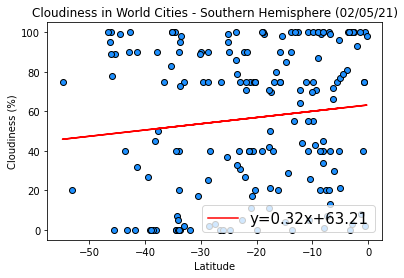

In [126]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, color = "dodgerblue", edgecolor = 'black')
plt.plot(x_values,regress_values, "red", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Label plot
plt.title(f"Cloudiness in World Cities - Southern Hemisphere ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.legend(loc = "best", fontsize=15)

# Save the figure
plt.savefig("../output_data/CloudinessvsLat_LinReg_SouthernHem.png.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0017435114501761775


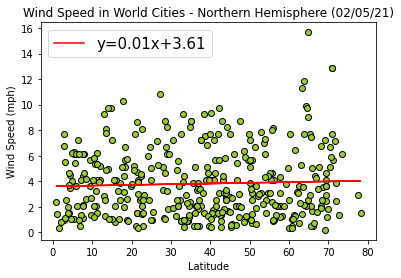

In [122]:
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, color = "yellowgreen", edgecolor = 'black')
plt.plot(x_values,regress_values, "red", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Label plot
plt.title(f"Wind Speed in World Cities - Northern Hemisphere ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.legend(loc = "best", fontsize=15)

# Save the figure
plt.savefig("../output_data/WindSpeedvsLat_LinReg_NorthernHem.png.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.026673999471485473


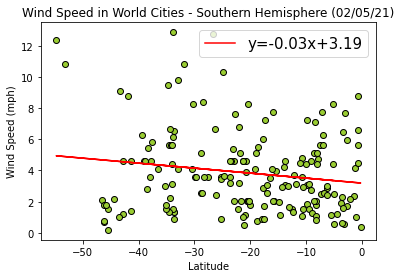

In [121]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, color = "yellowgreen", edgecolor = 'black')
plt.plot(x_values,regress_values, "red", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Label plot
plt.title(f"Wind Speed in World Cities - Southern Hemisphere ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.legend(loc = "best", fontsize=15)

# Save the figure
plt.savefig("../output_data/WindSpeedvsLat_LinReg_SouthernHem.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()